In [36]:
using DecisionMakingProblems
using POMDPs
using QuickPOMDPs
using POMDPModelTools
using MCTS
using POMDPSimulators
using POMDPPolicies
using BenchmarkTools
using Plots
using Statistics

In [38]:
twenty_forty_eight_config = DecisionMakingProblems.TwentyFortyEight(;γ=0.99)

twenty_forty_eight = QuickMDP(
    gen = function(s, a, rng)
        sp, r = DecisionMakingProblems.transition_and_reward(twenty_forty_eight_config, s, a)
        return (sp=sp, r=r)
    end,
    actions = [
        DecisionMakingProblems.UP,
        DecisionMakingProblems.RIGHT, 
        DecisionMakingProblems.DOWN, 
        DecisionMakingProblems.LEFT
    ],
    discount=0.99,
    initialstate = ImplicitDistribution(rng->DecisionMakingProblems.initial_board()),
    isterminal = s -> DecisionMakingProblems.isdone(s),
    statetype=UInt64
);

In [39]:
solver = MCTSSolver(n_iterations=100, depth=10, exploration_constant=5.0)
planner = solve(solver, twenty_forty_eight);

In [40]:
init = DecisionMakingProblems.initial_board()

0x0000010100000000

In [41]:
simulator = RolloutSimulator()

RolloutSimulator{Random._GLOBAL_RNG}(Random._GLOBAL_RNG(), nothing, nothing)

In [42]:
rollouts_zach = [ simulate(simulator, twenty_forty_eight, planner, init) for _ in 1:100 ]

100-element Vector{Float64}:
 1409.962482285106
 1368.68002336626
 1398.997569619414
 1352.6169915143869
 1436.5276313588834
 1361.159123218977
 1359.8212264894476
 1441.9721895293062
 1385.595908094408
 1371.0287315963417
 1433.1437060707935
 1426.6378987545088
 1421.9818673859402
    ⋮
 1327.457714709257
 1364.3559365583667
 1415.8930342013614
 1324.7566152326963
 1292.5423172119072
 1394.381317250008
 1363.2482914547932
 1468.7615453793612
 1387.9611747623971
 1396.1747872765184
 1386.564780270363
 1396.0002668175023

In [43]:
print("$(mean(rollouts_zach)) ± $(std(rollouts_zach))")

1394.1186397195147 ± 53.60594235303231

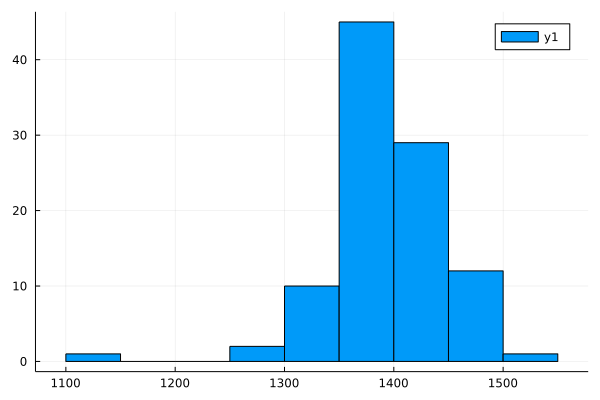

In [44]:
histogram(rollouts_zach)

In [47]:
@benchmark action(planner, init)

BenchmarkTools.Trial: 5799 samples with 1 evaluation.
 Range (min … max):  617.109 μs …  11.783 ms  ┊ GC (min … max): 0.00% … 92.11%
 Time  (median):     791.447 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   851.072 μs ± 626.427 μs  ┊ GC (mean ± σ):  4.71% ±  5.98%

            ▁▅▄▆▆██▅▅▂                                           
  ▁▁▁▁▃▆▆█▆▇████████████▆▆▅▅▄▄▄▃▃▃▂▂▂▂▂▂▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▃
  617 μs           Histogram: frequency by time         1.27 ms <

 Memory estimate: 258.75 KiB, allocs estimate: 9997.

In [45]:
@benchmark simulate(RolloutSimulator(), twenty_forty_eight, planner, init)

BenchmarkTools.Trial: 7 samples with 1 evaluation.
 Range (min … max):  639.906 ms …    1.028 s  ┊ GC (min … max): 5.01% … 5.33%
 Time  (median):     733.893 ms               ┊ GC (median):    4.46%
 Time  (mean ± σ):   789.451 ms ± 152.799 ms  ┊ GC (mean ± σ):  4.59% ± 0.59%

  █         ▁   ▁            ▁                      ▁         ▁  
  █▁▁▁▁▁▁▁▁▁█▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁█ ▁
  640 ms           Histogram: frequency by time          1.03 s <

 Memory estimate: 167.30 MiB, allocs estimate: 6612233.